In [2]:
import random 
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
%reload_ext autoreload
%autoreload 2
sys.path.append('../') # go back one dir 
from Helper_Modules import engine, utils, model_setups
from Helper_Modules.helper_functions import predict_on_list

c:\Users\AbdelrahmanE\AppData\Local\anaconda3\envs\pytorchv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# evaluate trans_v4_64_5e6_5e5

In [2]:
model = model_setups.efficientNet_b0(False, 2, device)
trans_v4_64_5e6_5e5 = utils.download_model("Quality-Classifier", "trans_v4_64_5e6_5e5:v0", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

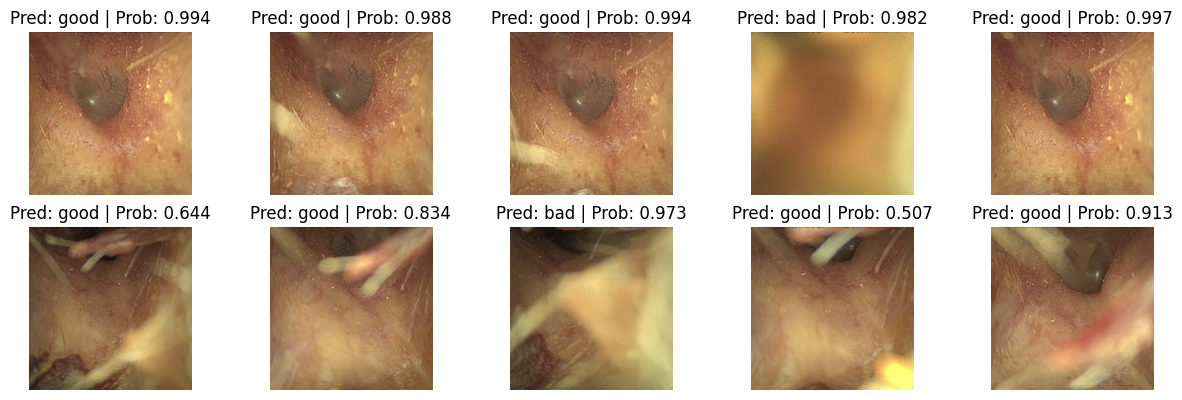

In [14]:
fake_paths = list(Path("../data/Dataset/train/Ear/").glob("*.png"))
predict_on_list(auto_transforms, trans_v4_64_5e6_5e5, device, ["bad", "good"], fake_paths[53:63], (15,30), True)

No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.


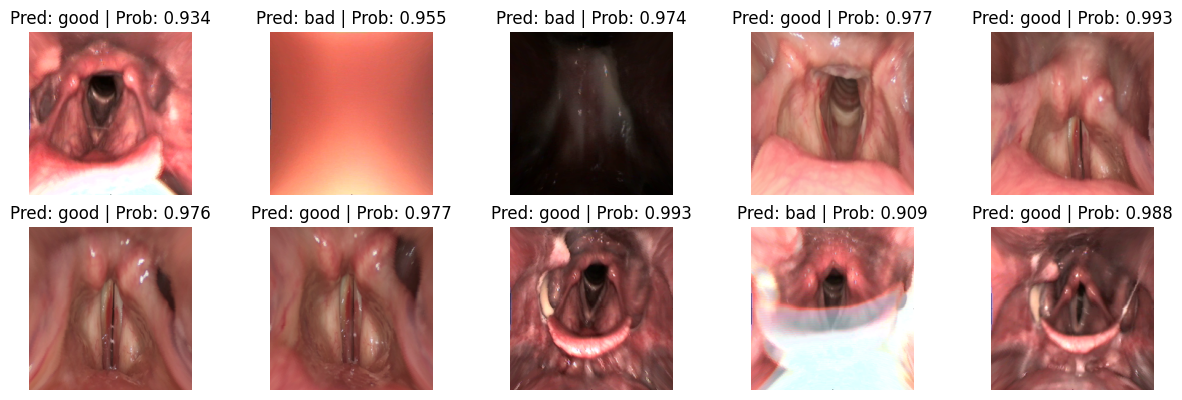

In [34]:
vocals_paths = list(Path("../data/Dataset/train/VocalFolds/").glob("*.png"))
predict_on_list(auto_transforms, trans_v4_64_5e6_5e5, device, ["bad", "good"],
                 vocals_paths[60:63] + vocals_paths[:2] + vocals_paths[41:42] + vocals_paths[30:31] + vocals_paths[-28:-26] + vocals_paths[-1:],
                 (15,30), True)

No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.
No completely black columns found.


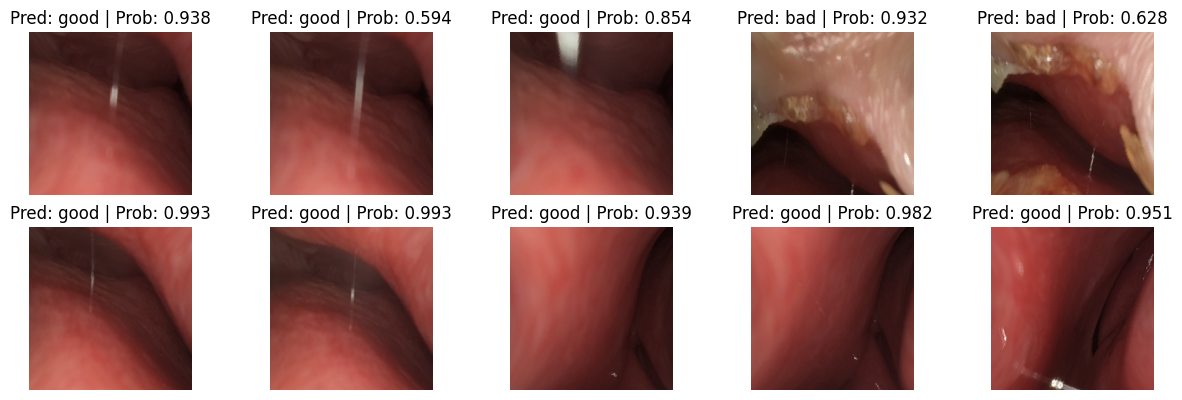

In [35]:
nose_paths = list(Path("../data/Dataset/train/Nose/").glob("*.png"))
predict_on_list(auto_transforms, trans_v4_64_5e6_5e5, device, ["bad", "good"],
                 nose_paths[60:63] + nose_paths[:2] + nose_paths[41:42] + nose_paths[30:31] + nose_paths[-28:-26] + nose_paths[-1:],
                 (15,30), True)

# evaluate tr_v1_64_1e5

In [4]:
model = model_setups.efficientNet_b0(False, 2, device)
tr_v1_64_1e5 = utils.download_model("Quality-Classifier", "tr_v1_64_1e5:v0", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

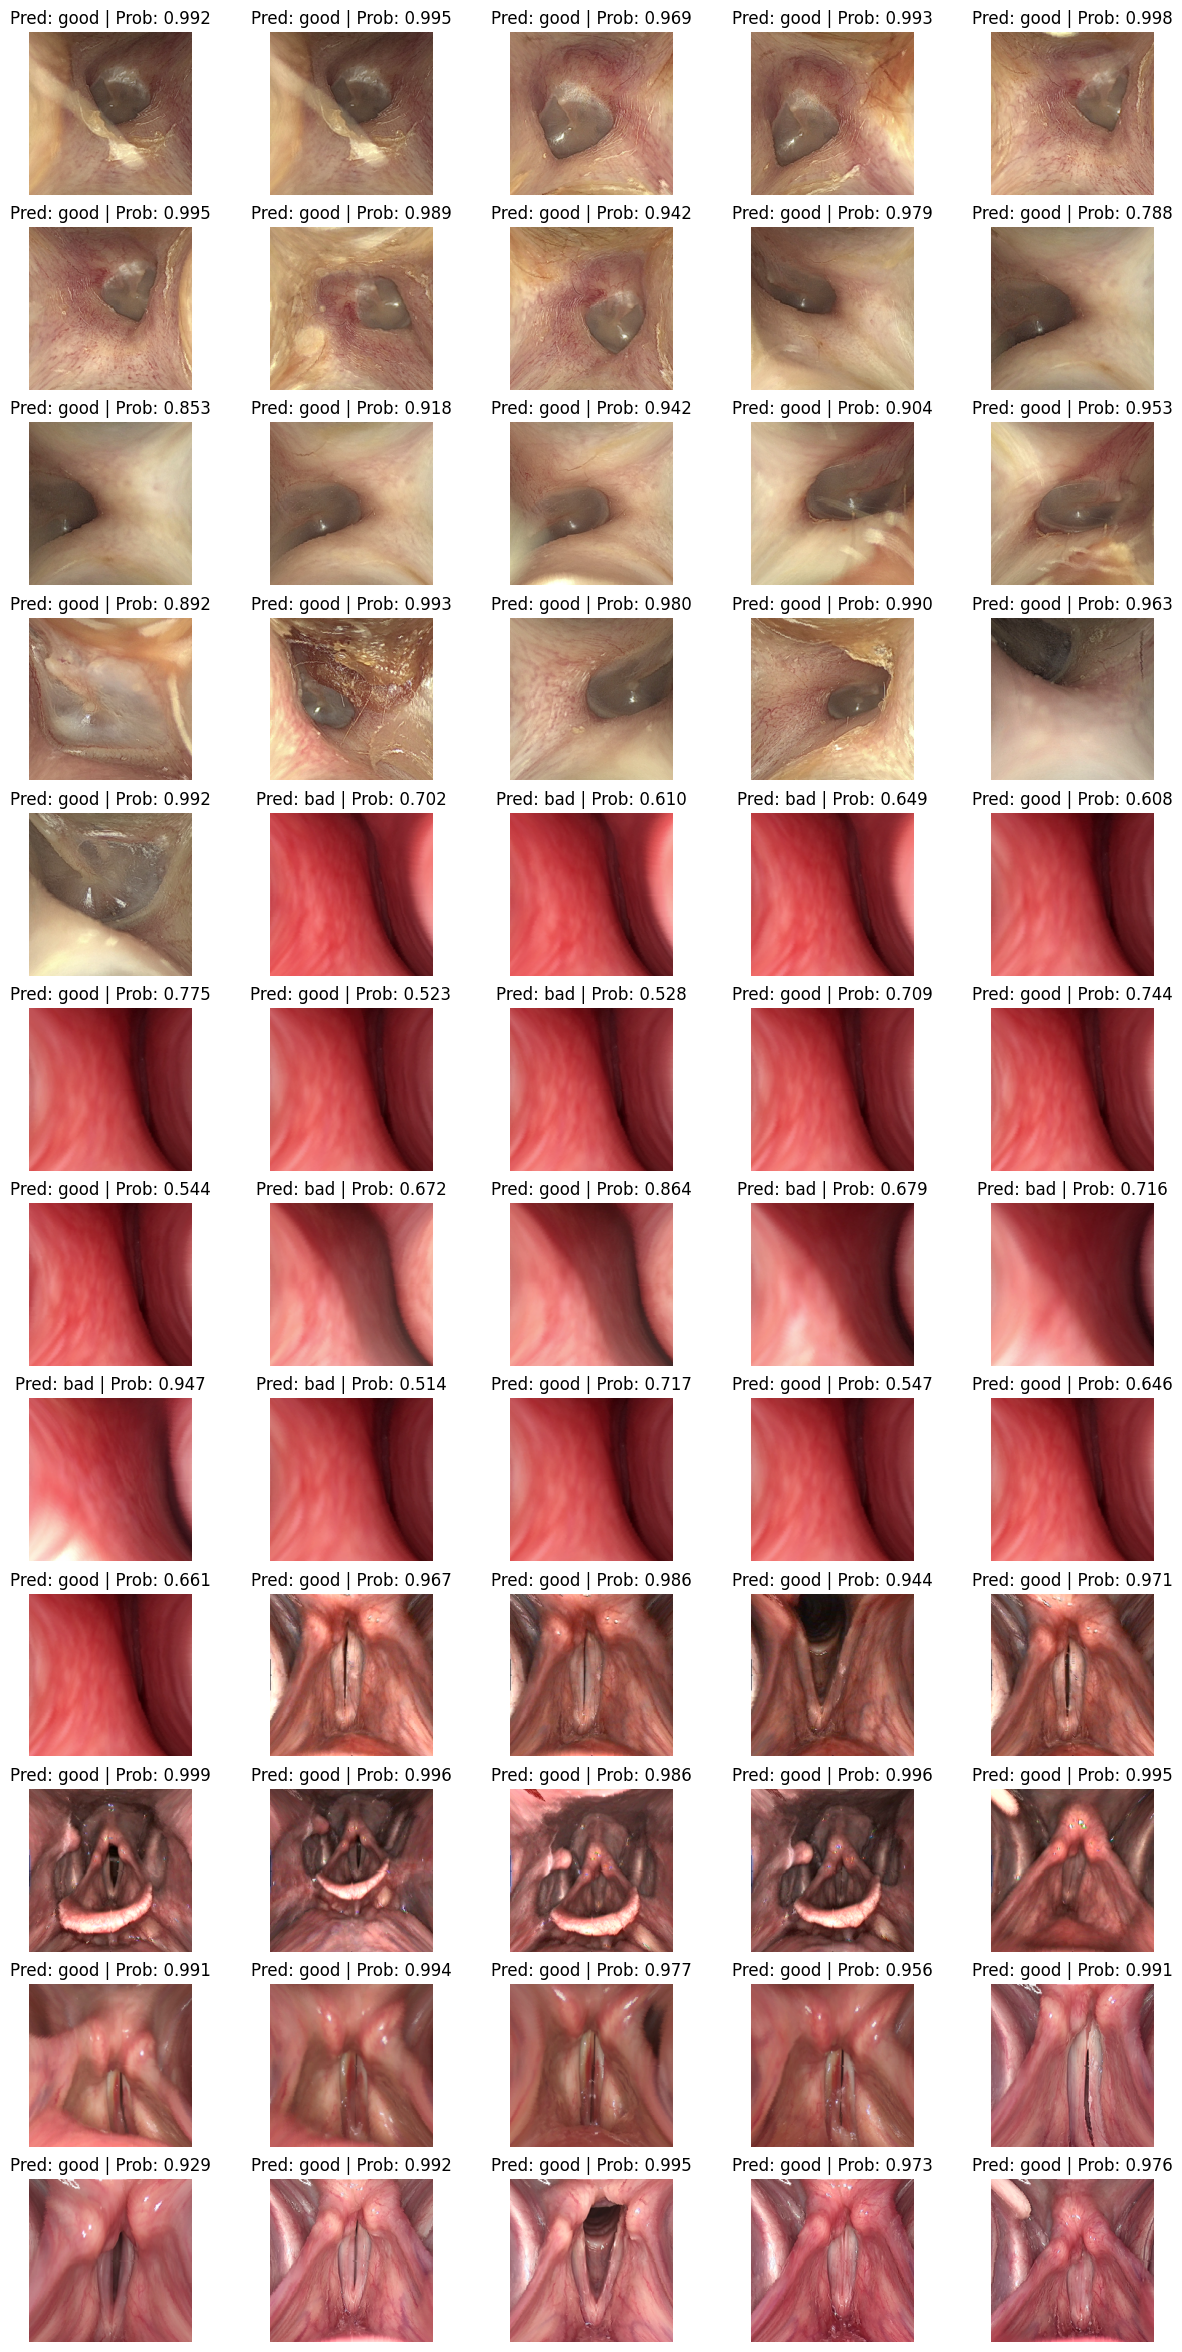

In [5]:
test_good_paths = list(Path("data/quality_1/test/good/").glob("*.png"))
predict_on_list(auto_transforms, tr_v1_64_1e5, device, ["bad", "good"], test_good_paths, (15,30), True)

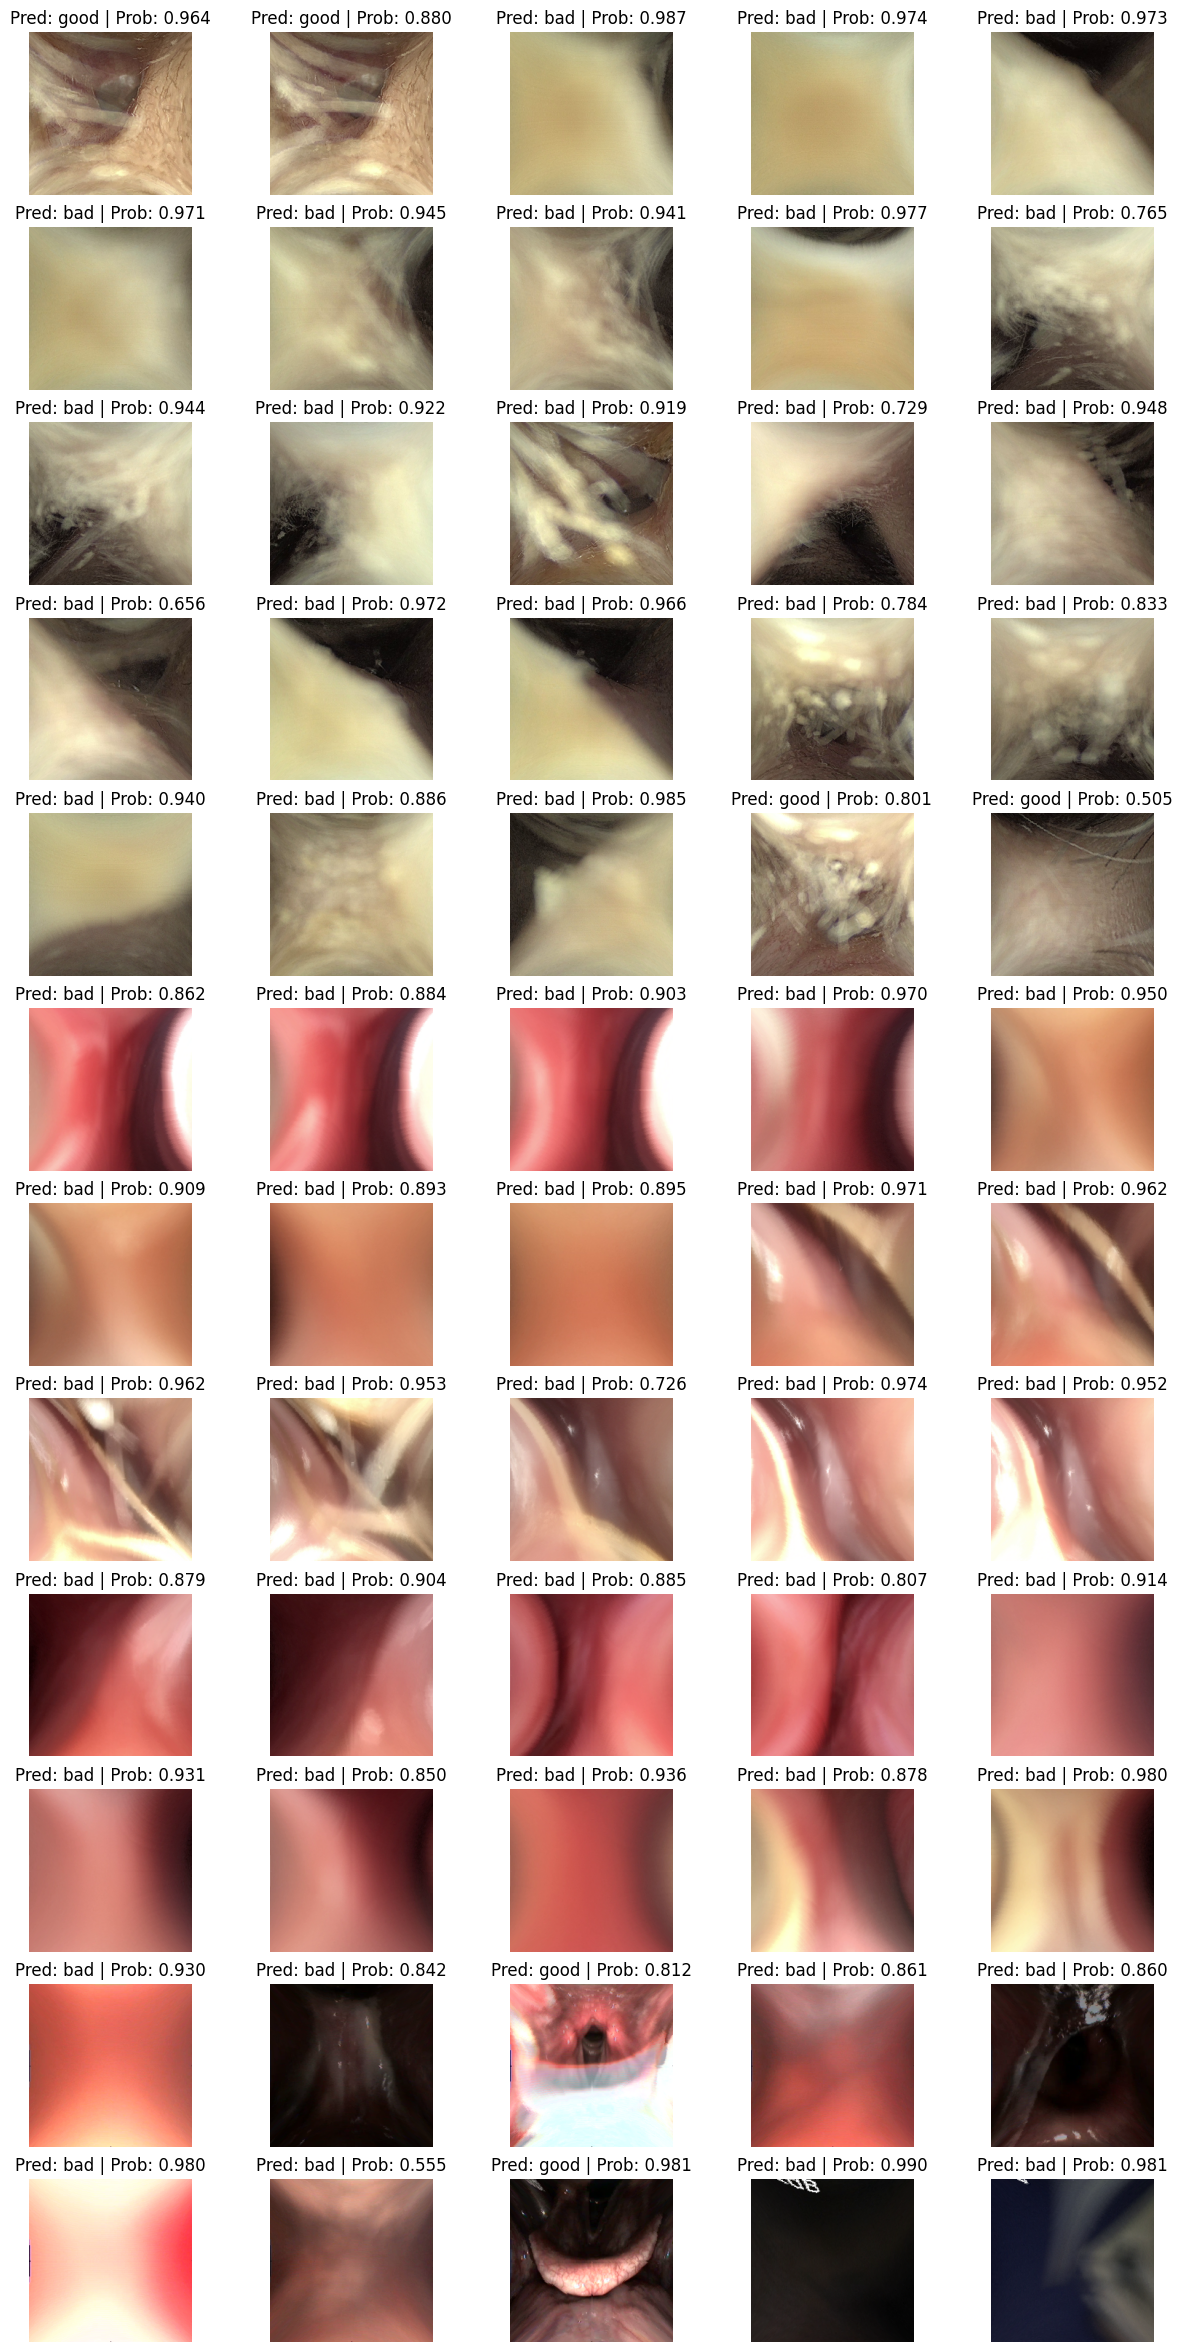

In [7]:
test_bad_paths = list(Path("data/quality_1/test/bad/").glob("*.png"))
predict_on_list(auto_transforms, tr_v1_64_1e5, device, ["bad", "good"], test_bad_paths, (15,30), True)